In [17]:
import pandas as pd

file_name = "OpenSea_NFT_Sales_2019_2021.csv"

try:
    df = pd.read_csv(file_name)

    print(f"Dataset '{file_name}' loaded successfully!")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print(f"\nOverall dataset information:")
    df.info()

    if 'Category' in df.columns:
        print(f"\nUnique values of 'Category' column:")
        print(df['Category'].unique())
    else:
        print("\n'Category' column not found in the dataset. Please check existing columns.")
        print(df.columns)

except FileNotFoundError:
    print(f"Error: File '{file_name}' not found. Please ensure the file is uploaded to Colab and its name is exactly correct.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Your file might not be in a proper CSV format or there might be another issue with it.")

/tmp/ipython-input-17-2403894120.py:6: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


Dataset 'OpenSea_NFT_Sales_2019_2021.csv' loaded successfully!

First 5 rows of the dataset:
        sales_datetime       id  asset.id asset.name asset.collection.name  \
0  2019-01-01 15:48:57  7453402         0        NaN                   NaN   
1  2019-01-01 23:50:55  7461241         0        NaN                   NaN   
2  2019-01-02 16:44:58  7471818         0        NaN                   NaN   
3  2019-01-03 06:31:46  7485269         0        NaN                   NaN   
4  2019-01-03 10:31:43  7487454         0        NaN                   NaN   

  asset.collection.short_description asset.permalink         total_price  \
0                                NaN             NaN  150000000000000000   
1                                NaN             NaN  120000000000000000   
2                                NaN             NaN  100000000000000000   
3                                NaN             NaN   10000000000000000   
4                                NaN             NaN  2495

In [18]:
import pandas as pd

file_name = "OpenSea_NFT_Sales_2019_2021.csv"

df = pd.read_csv(file_name)

df['total_price_ether'] = pd.to_numeric(df['total_price'], errors='coerce') / 1e18
df.dropna(subset=['total_price_ether'], inplace=True)

df['sales_datetime'] = pd.to_datetime(df['sales_datetime'])

df['sale_year'] = df['sales_datetime'].dt.year
df['sale_month'] = df['sales_datetime'].dt.month
df['sale_day_of_week'] = df['sales_datetime'].dt.day_name()

art_categories = ['Art', 'Photography', 'Music']
df_art = df[df['Category'].isin(art_categories)].copy()

print("دیتاست فیلتر شده برای آثار هنری:")
print(df_art.info())
print("\n۵ سطر اول دیتاست هنری:")
print(df_art.head())

print("\nمقادیر یکتای ستون 'Category' در دیتاست هنری:")
print(df_art['Category'].unique())

/tmp/ipython-input-18-866282334.py:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


دیتاست فیلتر شده برای آثار هنری:
<class 'pandas.core.frame.DataFrame'>
Index: 673135 entries, 48903 to 2909872
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   sales_datetime                      673135 non-null  datetime64[ns]
 1   id                                  673135 non-null  int64         
 2   asset.id                            673135 non-null  int64         
 3   asset.name                          628956 non-null  object        
 4   asset.collection.name               673135 non-null  object        
 5   asset.collection.short_description  1349 non-null    object        
 6   asset.permalink                     673135 non-null  object        
 7   total_price                         673135 non-null  object        
 8   payment_token.name                  673133 non-null  object        
 9   payment_token.usd_price             672973 non-n

/tmp/ipython-input-19-841129175.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, on_bad_lines='skip')


Filtered Dataset for All Categories:
<class 'pandas.core.frame.DataFrame'>
Index: 3109443 entries, 0 to 3109442
Data columns (total 19 columns):
 #   Column                              Dtype         
---  ------                              -----         
 0   sales_datetime                      datetime64[ns]
 1   id                                  int64         
 2   asset.id                            int64         
 3   asset.name                          object        
 4   asset.collection.name               object        
 5   asset.collection.short_description  object        
 6   asset.permalink                     object        
 7   total_price                         object        
 8   payment_token.name                  object        
 9   payment_token.usd_price             float64       
 10  asset.num_sales                     float64       
 11  seller.address                      object        
 12  seller.user.username                object        
 13  winner_acc

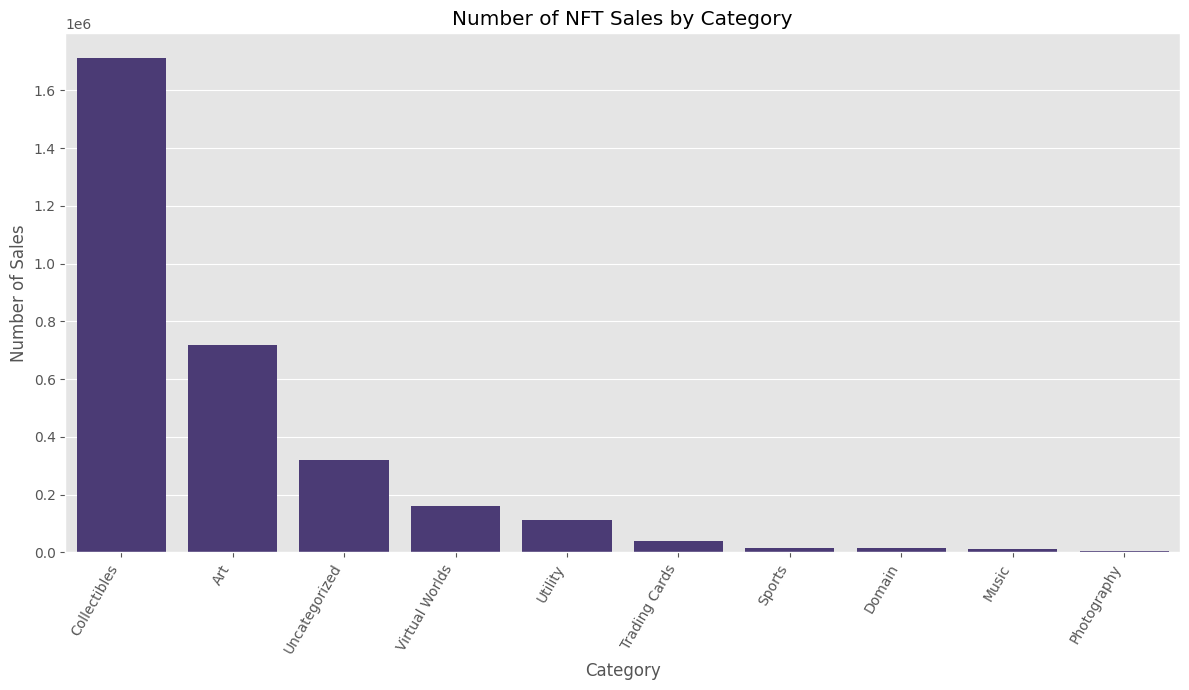


Total Revenue (Ether) by Category:
Category
Uncategorized     9.435502e+09
Collectibles      5.247075e+08
Virtual Worlds    3.476323e+08
Trading Cards     2.105210e+06
Art               1.545814e+06
Sports            7.998959e+05
Utility           2.772550e+05
Domain            1.002347e+05
Photography       1.196636e+04
Music             2.491623e+03
Name: total_price_ether, dtype: float64


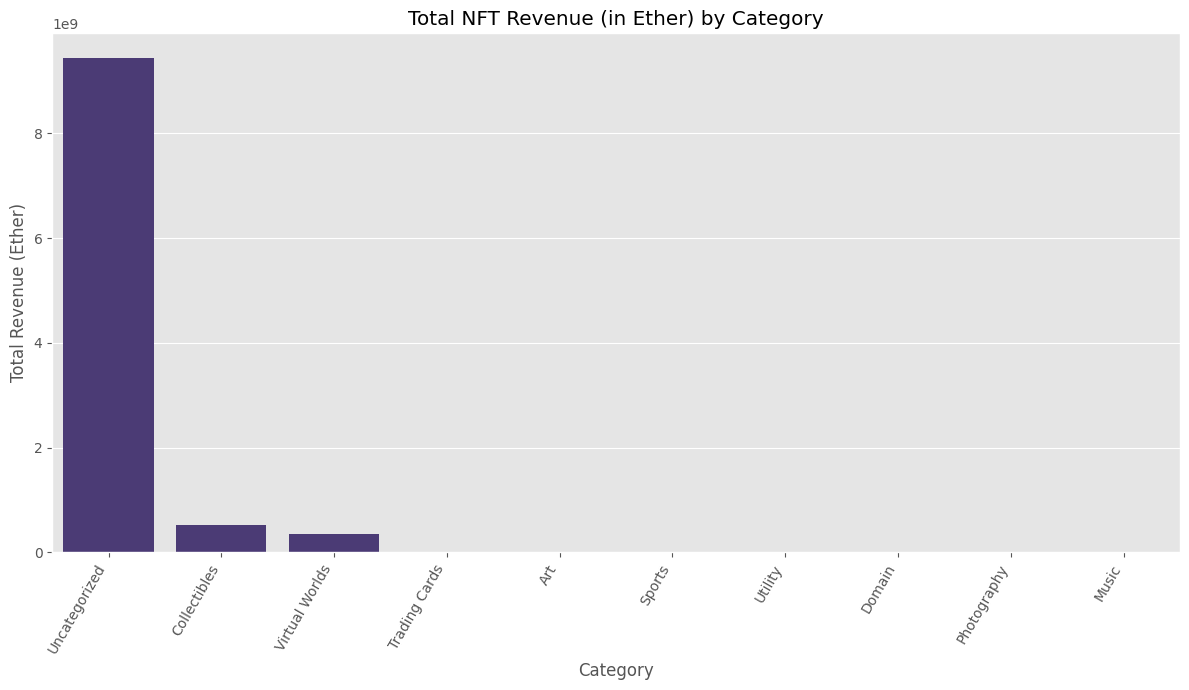


Average Sale Price (Ether) by Category:
Category
Uncategorized     29445.455362
Virtual Worlds     2178.611243
Collectibles        306.444882
Sports               56.109422
Trading Cards        51.761947
Domain                7.311065
Utility               2.482918
Art                   2.147718
Photography           1.973344
Music                 0.224815
Name: total_price_ether, dtype: float64


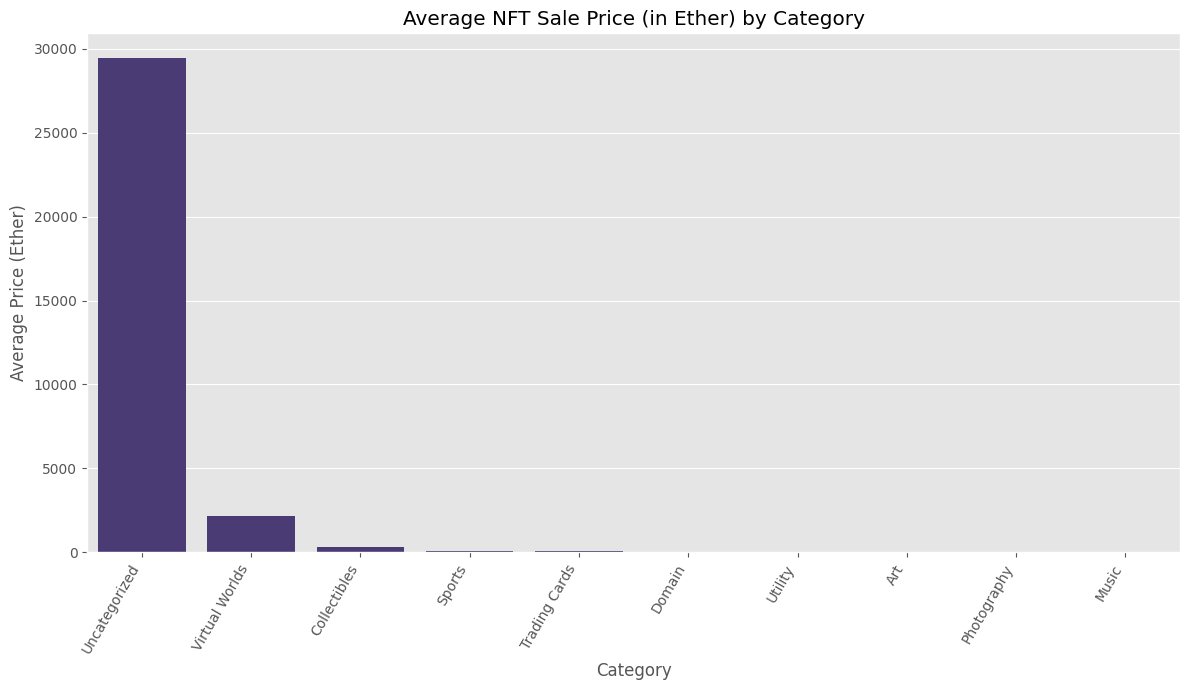

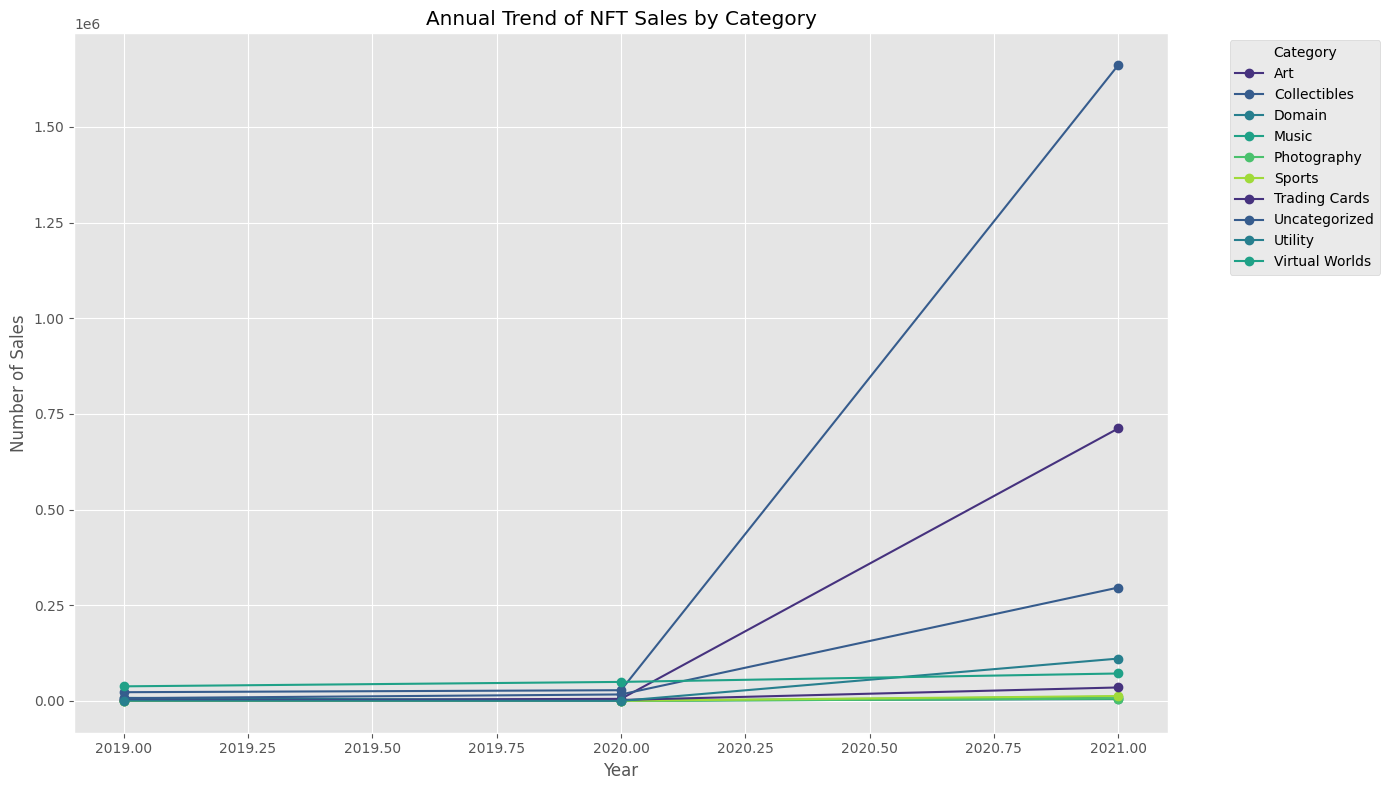

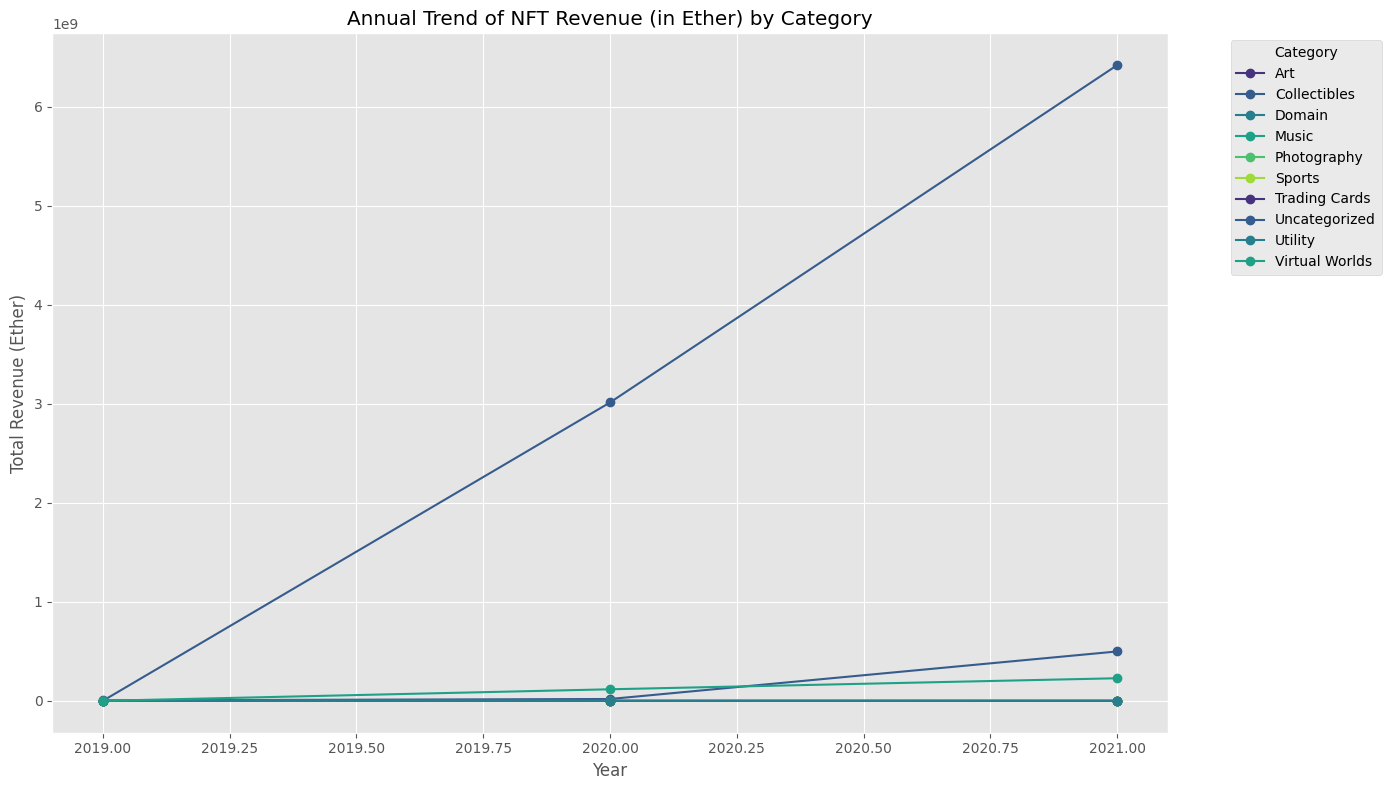

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_name = "OpenSea_NFT_Sales_2019_2021.csv"

try:
    # تلاش برای خواندن فایل CSV با نادیده گرفتن خطوط مشکل‌دار
    df = pd.read_csv(file_name, on_bad_lines='skip')
    # اگر on_bad_lines کار نکرد، می‌توانید به جای آن از engine='python' استفاده کنید:
    # df = pd.read_csv(file_name, engine='python')


    df['total_price_ether'] = pd.to_numeric(df['total_price'], errors='coerce') / 1e18
    df.dropna(subset=['total_price_ether'], inplace=True)

    df['sales_datetime'] = pd.to_datetime(df['sales_datetime'])

    df['sale_year'] = df['sales_datetime'].dt.year
    df['sale_month'] = df['sales_datetime'].dt.month
    df['sale_day_of_week'] = df['sales_datetime'].dt.day_name()

    all_categories = df['Category'].dropna().unique().tolist()
    df_filtered = df[df['Category'].isin(all_categories)].copy()


    print("Filtered Dataset for All Categories:")
    print(df_filtered.info())
    print("\nFirst 5 rows of the filtered dataset:")
    print(df_filtered.head())

    print("\nUnique values in 'Category' column of the filtered dataset:")
    print(df_filtered['Category'].unique())

    plt.style.use('ggplot')
    sns.set_palette('viridis')

    sales_by_category = df_filtered['Category'].value_counts()
    print("\nNumber of Sales by Category:")
    print(sales_by_category)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
    plt.title('Number of NFT Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Sales')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()

    revenue_by_category = df_filtered.groupby('Category')['total_price_ether'].sum().sort_values(ascending=False)
    print("\nTotal Revenue (Ether) by Category:")
    print(revenue_by_category)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values)
    plt.title('Total NFT Revenue (in Ether) by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Revenue (Ether)')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()

    avg_price_by_category = df_filtered.groupby('Category')['total_price_ether'].mean().sort_values(ascending=False)
    print("\nAverage Sale Price (Ether) by Category:")
    print(avg_price_by_category)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values)
    plt.title('Average NFT Sale Price (in Ether) by Category')
    plt.xlabel('Category')
    plt.ylabel('Average Price (Ether)')
    plt.xticks(rotation=60, ha='right')
    plt.tight_layout()
    plt.show()


    sales_over_time_category = df_filtered.groupby(['sale_year', 'Category']).size().unstack(fill_value=0)

    plt.figure(figsize=(14, 8))
    sales_over_time_category.plot(kind='line', marker='o', ax=plt.gca())
    plt.title('Annual Trend of NFT Sales by Category')
    plt.xlabel('Year')
    plt.ylabel('Number of Sales')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    revenue_over_time_category = df_filtered.groupby(['sale_year', 'Category'])['total_price_ether'].sum().unstack(fill_value=0)

    plt.figure(figsize=(14, 8))
    revenue_over_time_category.plot(kind='line', marker='o', ax=plt.gca())
    plt.title('Annual Trend of NFT Revenue (in Ether) by Category')
    plt.xlabel('Year')
    plt.ylabel('Total Revenue (Ether)')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error loading or processing the dataset: {e}")
    print("It seems there's an issue with parsing the CSV file.")
    print("Try uncommenting `on_bad_lines='skip'` or `engine='python'` in `pd.read_csv` if you haven't already.")
    print("If the error persists, the CSV file itself might be corrupted or severely malformed.")